## Demo for learning single channel PSF from bead data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
from dotted_dict import DottedDict


#### Load learned PSF model from bead data

In [2]:
#resfile = r'E:\EMBL files\data 2022\230202_Nup96SNAP_NC_M2\beads_30ms_conventional\30ms_conventional\psfmodel_zernike_single.h5'
resfile = r'E:\EMBL files\data 2022\230202_Nup96SNAP_NC_M2\beads_30ms_conventional\30ms_conventional\psfmodel_zernike_multi.h5'

f,p = io.h5.load(resfile) # load result file
L = psflearninglib()
L.param = p
L.param.PSFtype = 'insitu_zernike'

#### Generate PSF model at a given stage position
`Nz`: number of z slices  
`xsz`: number of pixels in both x and y dimension  
`stagepos`: stage position, value should be always positive, unit: micron  
Note: other parameters can be modified using `L.param`, such as pixel size, NA, refractive indices and wavelength

channel 0


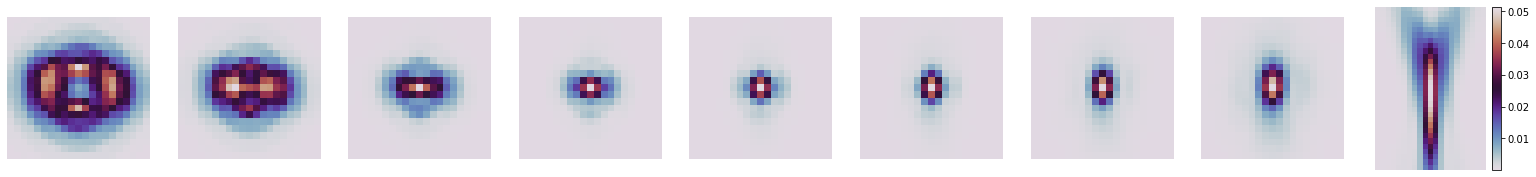

channel 1


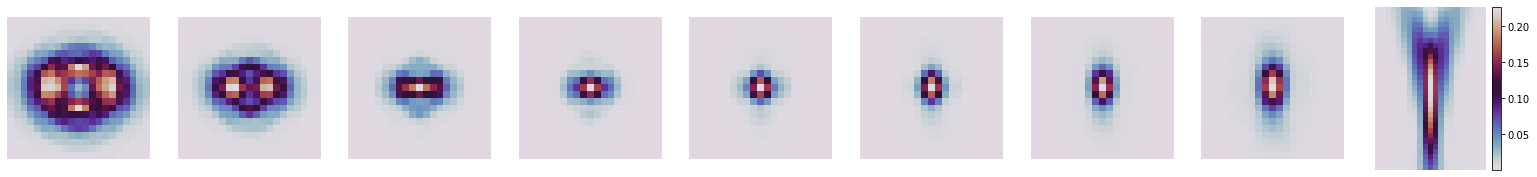

In [9]:
f,psfobj = L.genpsf(f,Nz=31,xsz=21,stagepos=5.0)
showpsf(f,p)

#### Generate spline model and save new PSF file

In [15]:
coeff = L.gencspline(f.res,psfobj)
f.locres.coeff = coeff
filename = p.savename+'_'+p.PSFtype+'_'+p.channeltype+'_IMM.h5'
L.writeh5file(filename,f.res,f.locres,f.rois)